#Fake News Detection using RNN and LSTM Networks.

##### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
import gensim

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding,GRU,SimpleRNN
from tensorflow.keras.layers import Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

Function to read the data


In [3]:
def read_data(data):
    Data_read=pd.read_csv(data)
    return Data_read

Analyzing the real news data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [5]:
Real_data=read_data('True.csv')

In [6]:
Real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
Real_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

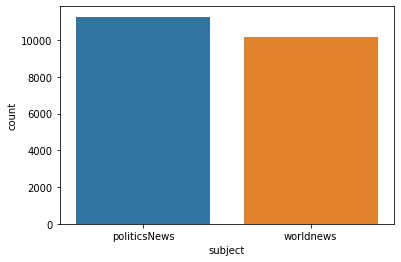

In [8]:
sns.countplot(x='subject',data=Real_data)

Visualizing the most occured words in the real data


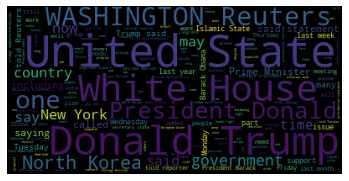

In [9]:
real_text=''.join(Real_data['text'].tolist())
wordcloud=WordCloud().generate(real_text)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Analyzing the fake news data

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [11]:
Fake_data=read_data('Fake.csv')
Fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
Fake_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

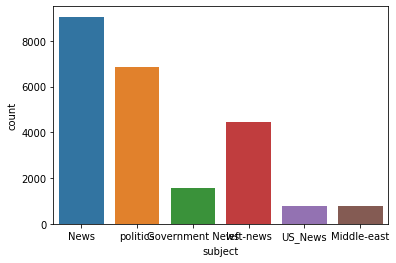

In [13]:
sns.countplot(x='subject',data=Fake_data)

Visualizing the most occured words in the fake data

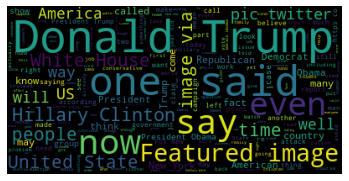

In [14]:
fake_text=''.join(Fake_data['text'].tolist())
wordcloud=WordCloud().generate(fake_text)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Preprocessing the data (Cleaning the data-Removing Reuters info)

In [15]:
# For real data
anonymous_data=[]
for i, row in enumerate(Real_data.text.values):
  try:
    known=row.split('-',maxsplit=1)
    known[1]
    # Checking if data came from twitter (120 characters max )
    assert(len(known[0])<120)
  except:
    anonymous_data.append(i)

In [16]:
print(len(anonymous_data))

222


In [17]:
Real_data.iloc[anonymous_data]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


Dropping the missing values

In [18]:
for i in range(len(Real_data)):
  if (Real_data.text[i]==' '):
    print(i)


8970


In [19]:
Real_data=Real_data.drop(8970, axis=0)

In [20]:
publisher=[]
text_data=[]

for i, row in enumerate(Real_data.text.values):
  if i in anonymous_data:
    text_data.append(row)
    publisher.append('anonymous')
  else:
    known=row.split('-',maxsplit=1)
    publisher.append(known[0].strip())
    text_data.append(known[1].strip())
    

In [21]:
Real_data['publisher']=publisher
Real_data['text']=text_data

In [22]:
Real_data.sample()

,title,text,subject,date,publisher
9046,Federal judges question intent behind North Ca...,Federal appeals court judges on Tuesday probed...,politicsNews,"June 21, 2016",WASHINGTON (Reuters)


Removing the null data values in Fake News Dataset

In [23]:
empty_indices=[i for i,text in enumerate(Fake_data.text.tolist()) if 
                str(text).strip()=='']
                

In [24]:
Fake_data.iloc[empty_indices].head()

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"


Text is missing because, it is in the title column itself, so merging both columns in both real and Fake dataset

In [25]:
Real_data['text']=Real_data['title']+" "+ Real_data['text']
Fake_data['text']=Fake_data['title']+" "+ Fake_data['text']

Converting all text to lower case

In [26]:
Real_data['text']=Real_data['text'].apply(lambda i: str(i).lower())
Fake_data['text']=Fake_data['text'].apply(lambda i: str(i).lower())

Giving class labels to both Fake and Real Dataset

In [27]:
Real_data['class']=1
Fake_data['class']=0

Extracting only the required columns

In [28]:
Real_data=Real_data[['text','class']]
Fake_data=Fake_data[['text','class']]

Combining both the datasets to pass it into the Neural Network for training

In [29]:
Appended_data=Real_data.append(Fake_data,ignore_index=True)

Removing special characters

In [30]:
Appended_data['text']=Appended_data['text'].str.replace('[^\w\s]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [31]:
Appended_data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


Performing the Word to Vector (Word2Vec) Vectorization i.e, embedding on the text data to pass it through the network for training.

In [32]:
labels=Appended_data['class'].values
Input=[i.split() for i in Appended_data['text'].tolist()]

In [33]:
vector_model_class=gensim.models.Word2Vec(sentences=Input, size=80, 
                                          window=8,min_count=1)

Tokenizing the data

In [34]:
# Instantiating the tokenizer class
tokenizer=Tokenizer()
tokenizer.fit_on_texts(Input)
Input=tokenizer.texts_to_sequences(Input)

Visualizing the histogram of the data to perform padding

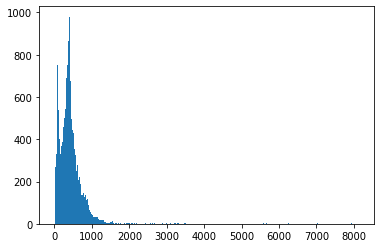

In [35]:
plt.hist([len(i) for i in Input], bins=1000)
plt.show()

Pad the text length of sequences to 800 (If length greater than 800, make it to 800, if less than 800, add zeroes(padding)) as there are very few sequences with length more than 800

In [36]:
Input=pad_sequences(Input, maxlen=800)

Initializing weight matrix with the data itself, and performing training on that

In [37]:
weight_init=np.zeros(((len(tokenizer.word_index))+1,80))
for word, index in tokenizer.word_index.items():
  weight_init[index]=vector_model_class.wv[word]

Creating the Neural Network Model (RNN)

In [38]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Training on RNN (Recurrent Neural Network)

Creating the Sequential RNN Model

In [39]:
model_1=Sequential()
model_1.add(Embedding(len(tokenizer.word_index)+1,output_dim=80,
            weights=[weight_init],input_length=800,trainable=True))
model_1.add(SimpleRNN(units=100,activation='tanh',dropout=0.24))
model_1.add(Dense(1,activation='sigmoid'))
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [40]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 80)           18468400  
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               18100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 18,486,601
Trainable params: 18,486,601
Non-trainable params: 0
_________________________________________________________________


Training the model

Splitting the training and testing data

In [41]:
Input_train, Input_test,Label_train, Label_test=train_test_split(Input,labels)

In [42]:
model_1.fit(Input_train, Label_train, validation_split=0.3, epochs=4)

Epoch 1/4
737/737 [==============================] - 963s 1s/step - loss: 0.3091 - acc: 0.8689 - val_loss: 0.2185 - val_acc: 0.9121
Epoch 2/4
737/737 [==============================] - 939s 1s/step - loss: 0.2243 - acc: 0.9100 - val_loss: 0.1816 - val_acc: 0.9367
Epoch 3/4
737/737 [==============================] - 940s 1s/step - loss: 0.1964 - acc: 0.9268 - val_loss: 0.1769 - val_acc: 0.9346
Epoch 4/4
737/737 [==============================] - 939s 1s/step - loss: 0.1654 - acc: 0.9392 - val_loss: 0.1566 - val_acc: 0.9452


Checking the classification report on Test set

In [43]:
pred_labels=model_1.predict((Input_test)>=0.5).astype(int)

In [57]:
print("Accuracy score is {0}".format(accuracy_score(Label_test, pred_labels)))

Accuracy score is 0.8809799554565702


## Training on LSTM (Long Short Term Memory Neural Network)

In [46]:
model_2=Sequential()
model_2.add(Embedding(len(tokenizer.word_index)+1,output_dim=80,
            weights=[weight_init],input_length=800,trainable=True))
model_2.add(LSTM(units=150,dropout=0.24))
model_2.add(Dense(1,activation='sigmoid'))
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [47]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 800, 80)           18468400  
                                                                 
 lstm (LSTM)                 (None, 150)               138600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 18,607,151
Trainable params: 18,607,151
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_2.fit(Input_train, Label_train, validation_split=0.2, epochs=5)

Epoch 1/5
842/842 [==============================] - 137s 158ms/step - loss: 0.1678 - acc: 0.9372 - val_loss: 0.0756 - val_acc: 0.9746
Epoch 2/5
842/842 [==============================] - 132s 157ms/step - loss: 0.0949 - acc: 0.9661 - val_loss: 0.0399 - val_acc: 0.9878
Epoch 3/5
842/842 [==============================] - 132s 157ms/step - loss: 0.0463 - acc: 0.9839 - val_loss: 0.0652 - val_acc: 0.9791
Epoch 4/5
842/842 [==============================] - 132s 156ms/step - loss: 0.0279 - acc: 0.9915 - val_loss: 0.0297 - val_acc: 0.9899
Epoch 5/5
842/842 [==============================] - 132s 156ms/step - loss: 0.0212 - acc: 0.9924 - val_loss: 0.0279 - val_acc: 0.9924


In [49]:
pred_labels_2=model_2.predict((Input_test)>=0.5).astype(int)

In [58]:
print("Test set accuracy on LSTM Model is {0}".
      format(accuracy_score(Label_test, pred_labels_2)))


Test set accuracy on LSTM Model is 0.9009799554565702
